Number of samples: 799
Number of unique input tokens: 69
Number of unique output tokens: 632
Max sequence length for inputs: 124
Max sequence length for outputs: 54
Train on 639 samples, validate on 160 samples
Epoch 1/100
639/639 [==============================] - 18s 28ms/step - loss: 1.6165 - acc: 0.0375 - val_loss: 2.4075 - val_acc: 0.0941
Epoch 2/100
639/639 [==============================] - 16s 24ms/step - loss: 1.2145 - acc: 0.0463 - val_loss: 2.0764 - val_acc: 0.0588
Epoch 3/100
639/639 [==============================] - 16s 25ms/step - loss: 1.1092 - acc: 0.0520 - val_loss: 2.0833 - val_acc: 0.0625
Epoch 4/100
639/639 [==============================] - 16s 25ms/step - loss: 1.0857 - acc: 0.0514 - val_loss: 2.0599 - val_acc: 0.0666
Epoch 5/100
639/639 [==============================] - 16s 24ms/step - loss: 1.0717 - acc: 0.0522 - val_loss: 2.0560 - val_acc: 0.0749
Epoch 6/100
639/639 [==============================] - 16s 24ms/step - loss: 1.0628 - acc: 0.0541 - val_loss: 2.06

Epoch 60/100
639/639 [==============================] - 20s 32ms/step - loss: 0.5913 - acc: 0.1295 - val_loss: 1.6962 - val_acc: 0.1490
Epoch 61/100
639/639 [==============================] - 19s 29ms/step - loss: 0.5862 - acc: 0.1291 - val_loss: 1.7358 - val_acc: 0.1464
Epoch 62/100
639/639 [==============================] - 19s 29ms/step - loss: 0.5778 - acc: 0.1313 - val_loss: 1.7345 - val_acc: 0.1473
Epoch 63/100
639/639 [==============================] - 19s 29ms/step - loss: 0.5718 - acc: 0.1312 - val_loss: 1.7156 - val_acc: 0.1450
Epoch 64/100
639/639 [==============================] - 19s 30ms/step - loss: 0.5652 - acc: 0.1343 - val_loss: 1.7403 - val_acc: 0.1471
Epoch 65/100
639/639 [==============================] - 20s 31ms/step - loss: 0.5589 - acc: 0.1347 - val_loss: 1.7738 - val_acc: 0.1418
Epoch 66/100
639/639 [==============================] - 19s 30ms/step - loss: 0.5519 - acc: 0.1359 - val_loss: 1.7562 - val_acc: 0.1464
Epoch 67/100
639/639 [==========================

C:\Projects\keras_talk\keras\keras\engine\network.py:877: UserWarning: Layer lstm_4 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'lstm_3/while/Exit_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'lstm_3/while/Exit_3:0' shape=(?, 256) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


-
Input sentence: Who?
Decoded sentence: 우리는 그것을 사용한다.

-
Input sentence: Hello!
Decoded sentence: 우리는 그것을 사용한다.

-
Input sentence: No way!
Decoded sentence: 나는 톰에게 잘 하고 싶지 않다.

-
Input sentence: No way!
Decoded sentence: 나는 톰에게 잘 하고 싶지 않다.

-
Input sentence: I'm sad.
Decoded sentence: 나는 톰에게 잘 하고 싶지 않다.

-
Input sentence: Me, too.
Decoded sentence: 나는 톰에게 잘 하고 싶지 않다.

-
Input sentence: Perfect!
Decoded sentence: 나는 그것을 무슨 좋아해요.

-
Input sentence: Shut up!
Decoded sentence: 톰은 그것을 무슨 일이을 있었다.

-
Input sentence: Welcome.
Decoded sentence: 우리는 그것을 사용한다.

-
Input sentence: Welcome.
Decoded sentence: 우리는 그것을 사용한다.

-
Input sentence: Cheer up!
Decoded sentence: 나는 그것을 무슨 일이해 고 했다.

-
Input sentence: Get lost.
Decoded sentence: 나는 그것을 무슨 좋아해요.

-
Input sentence: I'm ugly.
Decoded sentence: 나는 톰에게 잘 하고 싶지 않다.

-
Input sentence: It hurts.
Decoded sentence: 톰은 그것을 무슨 일이을 있었다.

-
Input sentence: Let's go!
Decoded sentence: 나는 그것을 허락하지 않아해.

-
Input sentence: Don't lie.
Decoded sentence: 우리는 그것을 

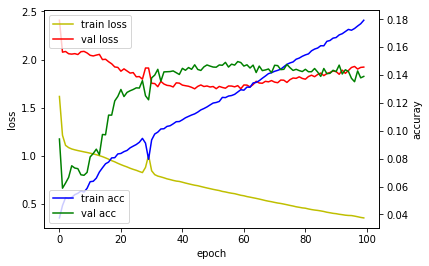

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function

from keras.models import Model
from keras.layers import Input, LSTM, Dense
import numpy as np

batch_size = 64  # Batch size for training.
epochs = 100  # Number of epochs to train for.
latent_dim = 256  # Latent dimensionality of the encoding space.
num_samples = 10000  # Number of samples to train on.
# Path to the data txt file on disk.
data_path = 'kor-eng/kor.txt'

# Vectorize the data.
input_texts = []
target_texts = []
input_characters = set()
target_characters = set()
with open(data_path, 'r', encoding='utf-8') as f:
    lines = f.read().split('\n')
for line in lines[: min(num_samples, len(lines) - 1)]:
    input_text, target_text = line.split('\t')
    # We use "tab" as the "start sequence" character
    # for the targets, and "\n" as "end sequence" character.
    target_text = '\t' + target_text + '\n'
    input_texts.append(input_text)
    target_texts.append(target_text)
    for char in input_text:
        if char not in input_characters:
            input_characters.add(char)
    for char in target_text:
        if char not in target_characters:
            target_characters.add(char)

input_characters = sorted(list(input_characters))
target_characters = sorted(list(target_characters))
num_encoder_tokens = len(input_characters)
num_decoder_tokens = len(target_characters)
max_encoder_seq_length = max([len(txt) for txt in input_texts])
max_decoder_seq_length = max([len(txt) for txt in target_texts])

print('Number of samples:', len(input_texts))
print('Number of unique input tokens:', num_encoder_tokens)
print('Number of unique output tokens:', num_decoder_tokens)
print('Max sequence length for inputs:', max_encoder_seq_length)
print('Max sequence length for outputs:', max_decoder_seq_length)

input_token_index = dict(
    [(char, i) for i, char in enumerate(input_characters)])
target_token_index = dict(
    [(char, i) for i, char in enumerate(target_characters)])

encoder_input_data = np.zeros(
    (len(input_texts), max_encoder_seq_length, num_encoder_tokens),
    dtype='float32')
decoder_input_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')
decoder_target_data = np.zeros(
    (len(input_texts), max_decoder_seq_length, num_decoder_tokens),
    dtype='float32')

for i, (input_text, target_text) in enumerate(zip(input_texts, target_texts)):
    for t, char in enumerate(input_text):
        encoder_input_data[i, t, input_token_index[char]] = 1.
    for t, char in enumerate(target_text):
        # decoder_target_data is ahead of decoder_input_data by one timestep
        decoder_input_data[i, t, target_token_index[char]] = 1.
        if t > 0:
            # decoder_target_data will be ahead by one timestep
            # and will not include the start character.
            decoder_target_data[i, t - 1, target_token_index[char]] = 1.

# Define an input sequence and process it.
encoder_inputs = Input(shape=(None, num_encoder_tokens))
encoder = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None, num_decoder_tokens))
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Run training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist=model.fit([encoder_input_data, decoder_input_data], decoder_target_data,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)
# Save model
model.save('s2s.h5')

# Next: inference mode (sampling).
# Here's the drill:
# 1) encode input and retrieve initial decoder state
# 2) run one step of decoder with this initial state
# and a "start of sequence" token as target.
# Output will be the next target token
# 3) Repeat with the current target token and current states

# Define sampling models
encoder_model = Model(encoder_inputs, encoder_states)

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(
    decoder_inputs, initial_state=decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs] + decoder_states)

# Reverse-lookup token index to decode sequences back to
# something readable.
reverse_input_char_index = dict(
    (i, char) for char, i in input_token_index.items())
reverse_target_char_index = dict(
    (i, char) for char, i in target_token_index.items())


def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, num_decoder_tokens))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0, target_token_index['\t']] = 1.

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > max_decoder_seq_length):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, num_decoder_tokens))
        target_seq[0, 0, sampled_token_index] = 1.

        # Update states
        states_value = [h, c]

    return decoded_sentence


for seq_index in range(100):
    # Take one sequence (part of the training set)
    # for trying out decoding.
    input_seq = encoder_input_data[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', input_texts[seq_index])
    print('Decoded sentence:', decoded_sentence)






fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()